### Initialize a network

In [77]:
#Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights' : [random() for i in range(n_inputs+1)]}for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights' : [random() for i in range(n_hidden+1)]}for i in range(n_outputs)]
    network.append(output_layer)
    return network

In [78]:
from random import seed
from random import random
from math import exp

In [79]:
seed(1)
network = initialize_network(1,2,2)
for layer in network:
    print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327]}, {'weights': [0.763774618976614, 0.2550690257394217]}]
[{'weights': [0.49543508709194095, 0.4494910647887381, 0.651592972722763]}, {'weights': [0.7887233511355132, 0.0938595867742349, 0.02834747652200631]}]


### Forward Propagate

In [5]:
#calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

In [6]:
#1. Neuron Activation
#activation = sum(weight_i * input_i) + bias
def activation(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation


In [7]:
#2. Neuron Transfer
#output = 1 / (1 + e^(-activation))
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [8]:
#3. Forward Propagation
#Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [47]:
#test forward propagation
network = initialize_network(2,1,2)
row = [1,0, None]
output = forward_propagate(network, row)
print('network : ',network)
print('output : ',output)

network :  [[{'weights': [0.8357651039198697, 0.43276706790505337, 0.762280082457942], 'output': 0.8317449956175151}], [{'weights': [0.0021060533511106927, 0.4453871940548014], 'output': 0.6099587652788487}, {'weights': [0.7215400323407826, 0.22876222127045265], 'output': 0.6961221914499027}]]
output :  [0.6099587652788487, 0.6961221914499027]


In [48]:
network

[[{'weights': [0.8357651039198697, 0.43276706790505337, 0.762280082457942],
   'output': 0.8317449956175151}],
 [{'weights': [0.0021060533511106927, 0.4453871940548014],
   'output': 0.6099587652788487},
  {'weights': [0.7215400323407826, 0.22876222127045265],
   'output': 0.6961221914499027}]]

In [49]:
output

[0.6099587652788487, 0.6961221914499027]

### Back propagate Error

In [10]:
#Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

In [16]:
#Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i+1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [ ]:
expected = [0,1]
backward_propagate_error(network, expected)
for layer in network:
    print(layer)

In [ ]:
network

### Train Network

In [23]:
#Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

In [28]:
#Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i] - outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>>epoch = %d, l_rate = %.3f, error = %.3f' %(epoch, l_rate, sum_error))

In [ ]:
# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 20, n_outputs)
for layer in network :
    print(layer)

### Example of backpropagation

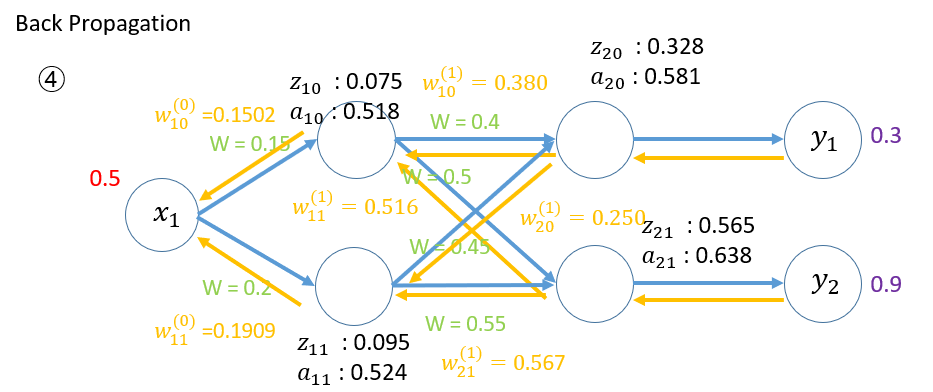

In [3]:
from PIL import Image
im = Image.open('backpropagation.png')
im

In [103]:
#Initialize a network
def initialize_network(hidden1, hidden2):
    network = list()
    hidden_layer1 = [{'weights' : [hidden1[i][j] for j in range(len(hidden1[0]))]}for i in range(len(hidden1))]
    network.append(hidden_layer1)
    hidden_layer2 = [{'weights' : [hidden2[i][j] for j in range(len(hidden2[0]))]} for i in range(len(hidden2))]
    network.append(hidden_layer2)
    return network

In [305]:
from math import exp
#calculate neuron activation for an input
def activate(weights, inputs):
    activation = 0
    for i in range(len(weights)):
        activation += weights[i] * inputs[i]
    return activation

#1. Neuron Activation
#activation = sum(weight_i * input_i) + bias
def activation(weights, inputs):
    activation = 0
    for i in range(len(weights)):
        activation += weights[i] * inputs[i]
    return activation

#2. Neuron Transfer
#output = 1 / (1 + e^(-activation))
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

#3. Forward Propagation
#Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

#Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

#Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i+1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
            
#Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']
            
#Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch):
    errors = []
    weights = []
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0.3, 0.9]
            sum_error += 0.5*sum([(expected[i] - outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        k = [network[i][j]['weights'] for i in range(len(network)) for j in range(len(network[i]))]    
        print('>>epoch = %d, l_rate = %.3f, error = %.3f' %(epoch, l_rate, sum_error))
        errors.append(sum_error)
    return errors

In [306]:
#test forward propagation
hidden1 = [[0.15], [0.2]]
hidden2 = [[0.4, 0.45], [0.5, 0.55]]
network = initialize_network(hidden1, hidden2)
dataset = [[0.5]]
a = train_network(network, dataset, 0.5, 100)

>>epoch = 0, l_rate = 0.500, error = 0.083
>>epoch = 1, l_rate = 0.500, error = 0.078
>>epoch = 2, l_rate = 0.500, error = 0.074
>>epoch = 3, l_rate = 0.500, error = 0.069
>>epoch = 4, l_rate = 0.500, error = 0.065
>>epoch = 5, l_rate = 0.500, error = 0.062
>>epoch = 6, l_rate = 0.500, error = 0.058
>>epoch = 7, l_rate = 0.500, error = 0.054
>>epoch = 8, l_rate = 0.500, error = 0.051
>>epoch = 9, l_rate = 0.500, error = 0.048
>>epoch = 10, l_rate = 0.500, error = 0.045
>>epoch = 11, l_rate = 0.500, error = 0.043
>>epoch = 12, l_rate = 0.500, error = 0.040
>>epoch = 13, l_rate = 0.500, error = 0.038
>>epoch = 14, l_rate = 0.500, error = 0.036
>>epoch = 15, l_rate = 0.500, error = 0.034
>>epoch = 16, l_rate = 0.500, error = 0.032
>>epoch = 17, l_rate = 0.500, error = 0.030
>>epoch = 18, l_rate = 0.500, error = 0.028
>>epoch = 19, l_rate = 0.500, error = 0.027
>>epoch = 20, l_rate = 0.500, error = 0.025
>>epoch = 21, l_rate = 0.500, error = 0.024
>>epoch = 22, l_rate = 0.500, error = 0.02

In [288]:
#errors
a

[0.08324529829818045,
 0.07837441759151743,
 0.07377804325995407,
 0.06944371672737623,
 0.06535929784055891,
 0.06151294307578087,
 0.05789309472613831,
 0.05448847925407525,
 0.05128811271792831,
 0.048281311157415366,
 0.045457703968921626,
 0.04280724855082384,
 0.040320244800522154,
 0.03798734836036396,
 0.035799581812845226,
 0.033748343299483785,
 0.031825412273211014,
 0.03002295228730486,
 0.02833351087508535,
 0.026750016686770482]

In [294]:
b

[[0.1813072254454108],
 [0.2919480015899428],
 [0.1047119550439185, -0.41802746837021393],
 [0.7327727107975223, 1.2342578357594174],
 [0.1813072254454108],
 [0.2919480015899428],
 [0.1047119550439185, -0.41802746837021393],
 [0.7327727107975223, 1.2342578357594174],
 [0.1813072254454108],
 [0.2919480015899428],
 [0.1047119550439185, -0.41802746837021393],
 [0.7327727107975223, 1.2342578357594174],
 [0.1813072254454108],
 [0.2919480015899428],
 [0.1047119550439185, -0.41802746837021393],
 [0.7327727107975223, 1.2342578357594174],
 [0.1813072254454108],
 [0.2919480015899428],
 [0.1047119550439185, -0.41802746837021393],
 [0.7327727107975223, 1.2342578357594174],
 [0.1813072254454108],
 [0.2919480015899428],
 [0.1047119550439185, -0.41802746837021393],
 [0.7327727107975223, 1.2342578357594174],
 [0.1813072254454108],
 [0.2919480015899428],
 [0.1047119550439185, -0.41802746837021393],
 [0.7327727107975223, 1.2342578357594174],
 [0.1813072254454108],
 [0.2919480015899428],
 [0.104711955043

In [299]:
import matplotlib.pyplot as plt

Text(0,0.5,'error')

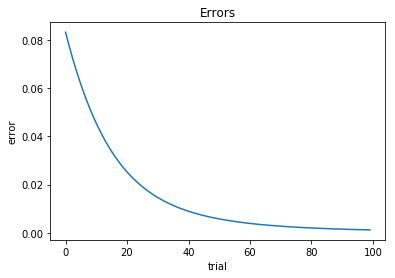

In [307]:
plt.plot(a)
plt.title('Errors')
plt.xlabel('trial')
plt.ylabel('error')